In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# <center>Laboratorium 8: wartości własne</center>

***Zadanie 1***   

Wykorzystując funkcję *random_matrix_by_egval* wygenerować losowe macierze dla zadanych zestawów wartości własnych:

$\lambda_{1} = \{ 0 , 1 , 2 , ... , 20 \}$

$\lambda_{2} = \{ 10^{-10} , 10^{-9} , ... , 10^{-1} , 1 \}$

$\lambda_{3} = \{ j , -j , 1+j , 1-j \}$

Następnie dla wygenerowanych macierzy oblicz wartości własne za pomocą funkcji *eigvals* i wyrysuj je na wykresie.

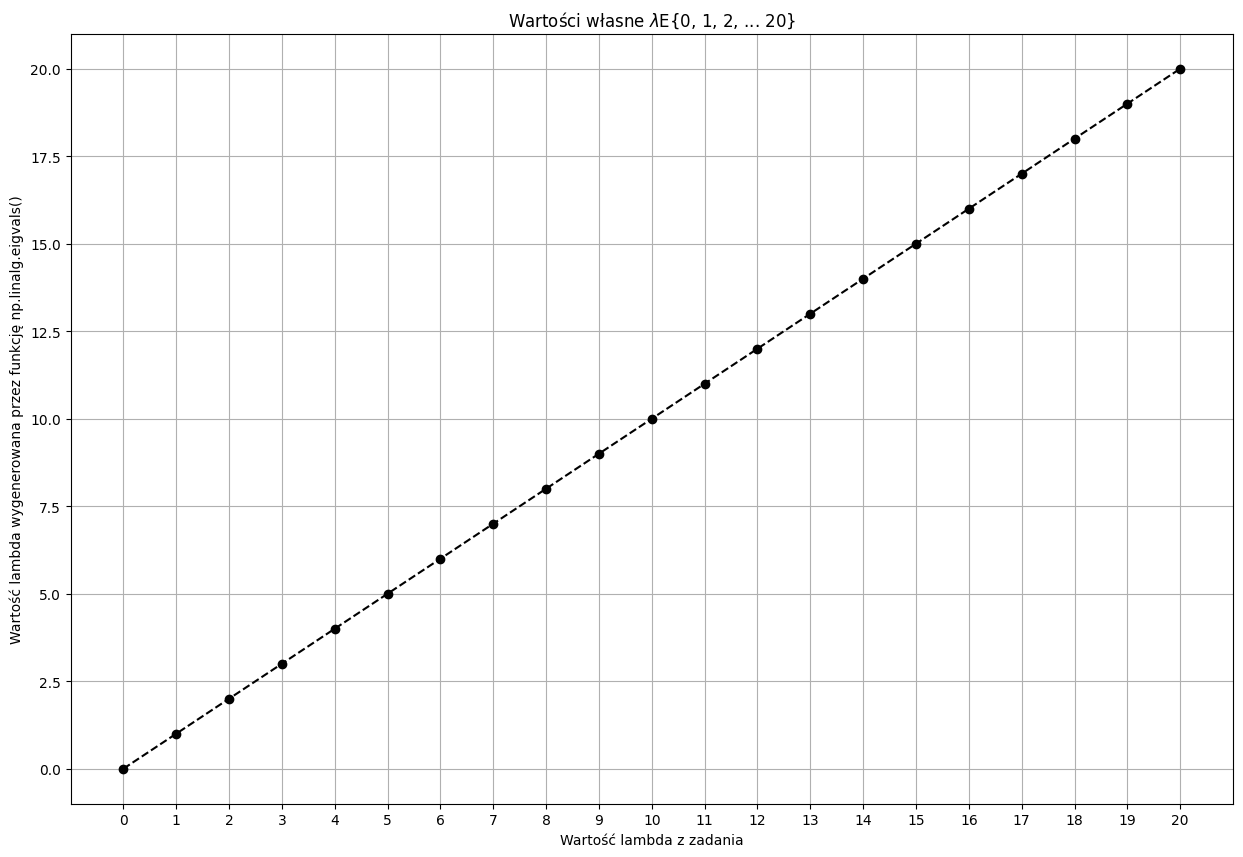

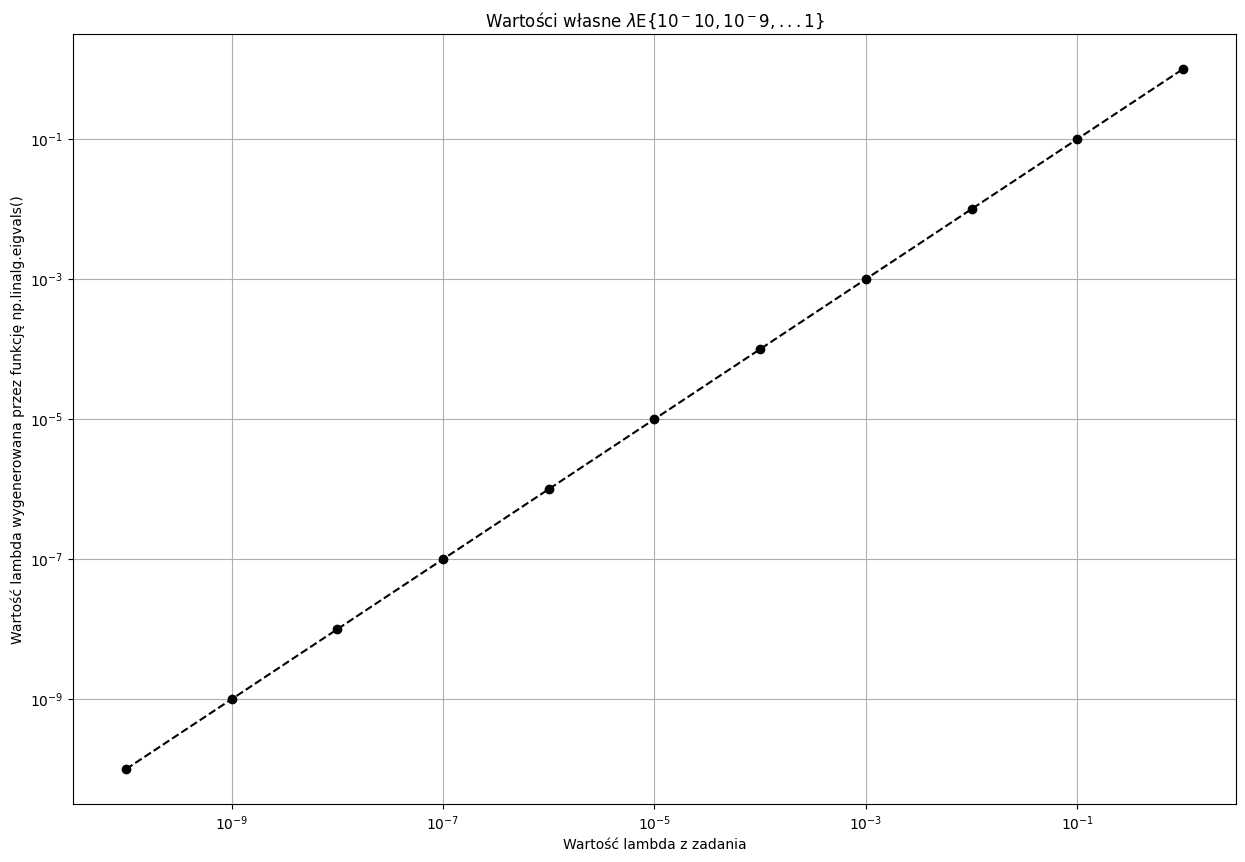

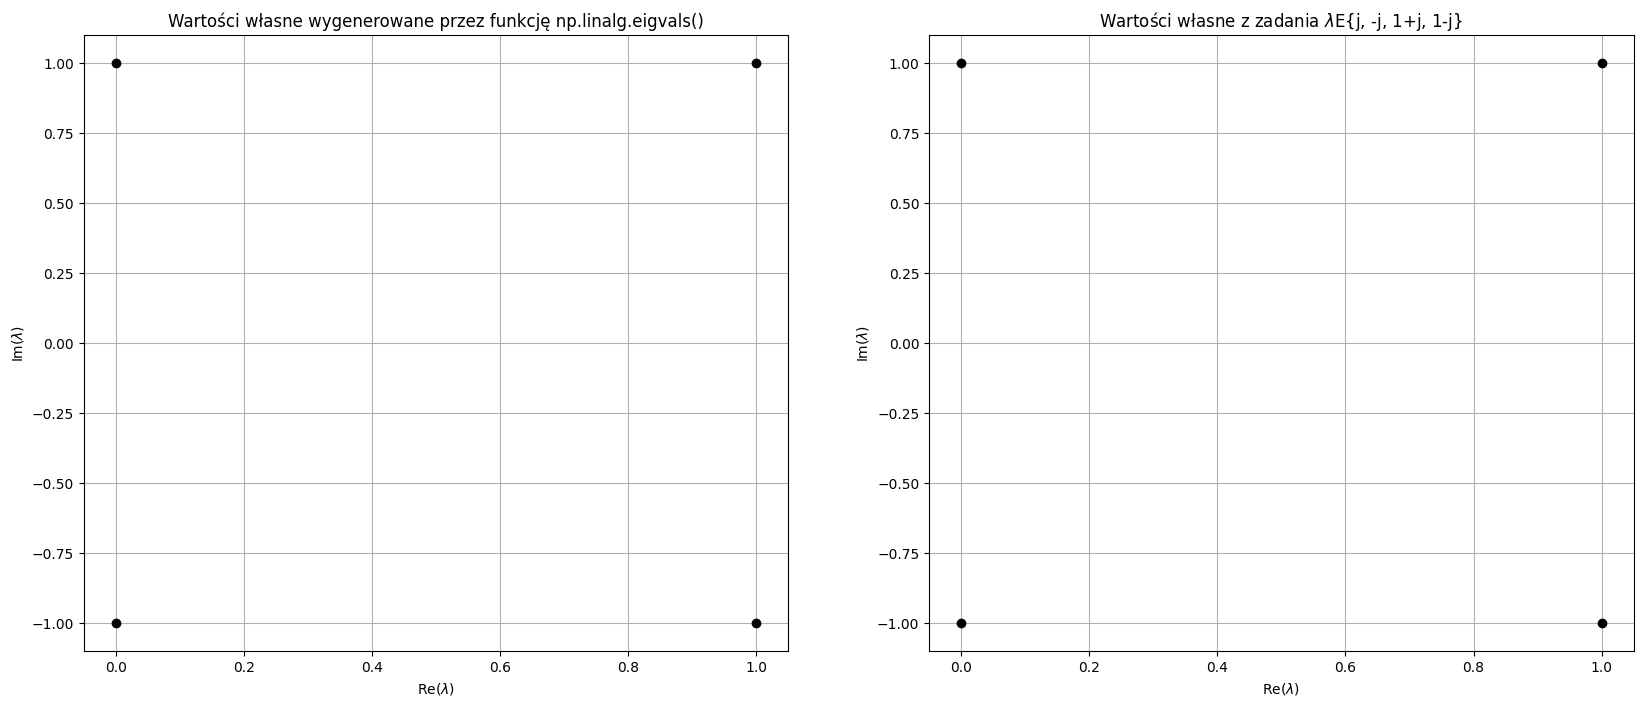

In [2]:
lambda1 = np.linspace(0, 20, 21)
lambda2 = np.logspace(-10, 0, 11)
lambda3 = np.array([1j, -1j, 1+1j, 1-1j])

lambdas = [lambda1, lambda2, lambda3]

eigvals = []
matrices = []

for lambda_ in lambdas:
    matrix = main.random_matrix_by_egval(lambda_)
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues = np.sort(eigenvalues)
    eigvals.append(eigenvalues)
    matrices.append(matrix)

plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.plot(lambda1, eigvals[0], 'ko--')
plt.xticks([i for i in range(21)])
ax.set(xlabel='Wartość lambda z zadania', ylabel='Wartość lambda wygenerowana przez funkcję np.linalg.eigvals()')
plt.title(label='Wartości własne $\lambda$E{0, 1, 2, ... 20}')
plt.grid()
plt.show()

plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.plot(lambda2, eigvals[1], 'ko--')
plt.xticks([10**i for i in range(-10, 1)])
ax.set(xlabel='Wartość lambda z zadania', ylabel='Wartość lambda wygenerowana przez funkcję np.linalg.eigvals()')
plt.title(label='Wartości własne $\lambda$E{$10^-10, 10^-9, ... 1$}')
plt.semilogx()
plt.semilogy()
plt.grid()
plt.show()

x = [item.real for item in eigvals[2]]
y = [item.imag for item in eigvals[2]]

plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
ax.plot(x, y, 'ko')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.title(label='Wartości własne wygenerowane przez funkcję np.linalg.eigvals()')
plt.grid()

ax = plt.subplot(1, 2, 2)
ax.plot([item.real for item in lambda3], [item.imag for item in lambda3], 'ko')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.title(label='Wartości własne z zadania $\lambda$E{j, -j, 1+j, 1-j}')
plt.grid()
plt.show()

Wartości własne obliczone przez funkcję np.linalg.eigvals() są bardzo zbliżone do wartości podanych w zadaniu. Błędy jakie wystąpiły są na poziomie co najwyżej zera maszynowego. Dodatkowo dla przypadku zespolonego rezultaty przedsstawiłem na dwóch wykresach tak by uniknąć nakładania się punktów co mogłoby skutkować nieczytelnością wykresu.

***Zadanie 2***   

Wykorzystując zestawy wartości własnych z zadania pierwszego wygeneruj macierze funkcją *random_matrix_by_egval* (lub uzyj wygenerowanych wcześniej macierzy). 

Następnie do otrzymanych wyników dodaj macierz $B$, gdzie $B = \alpha I$, przy czym $\alpha$ równa się ilości liter w Twoim nazwisku.

Wypisz wartości własne otrzymanej w ten sposób macierzy. Porównaj je z pierwotnie wykorzystanymi.

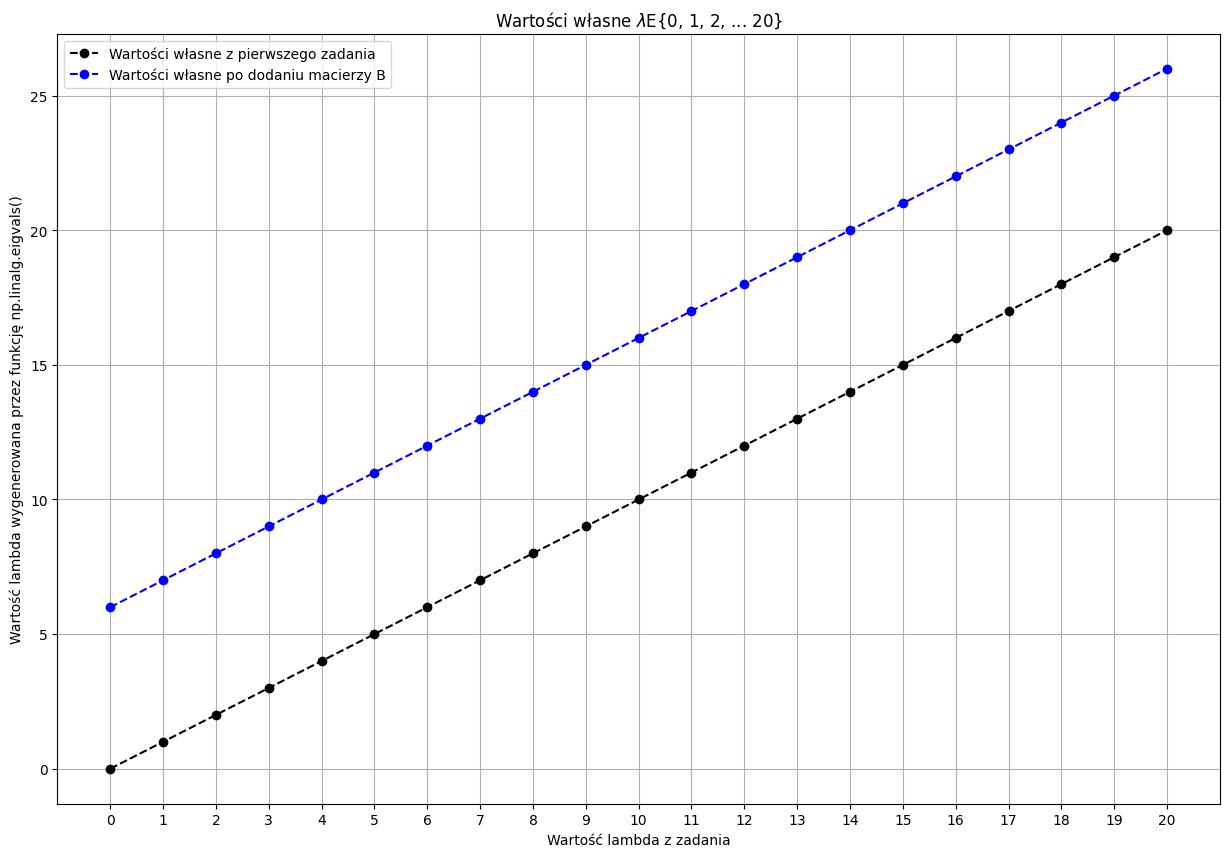

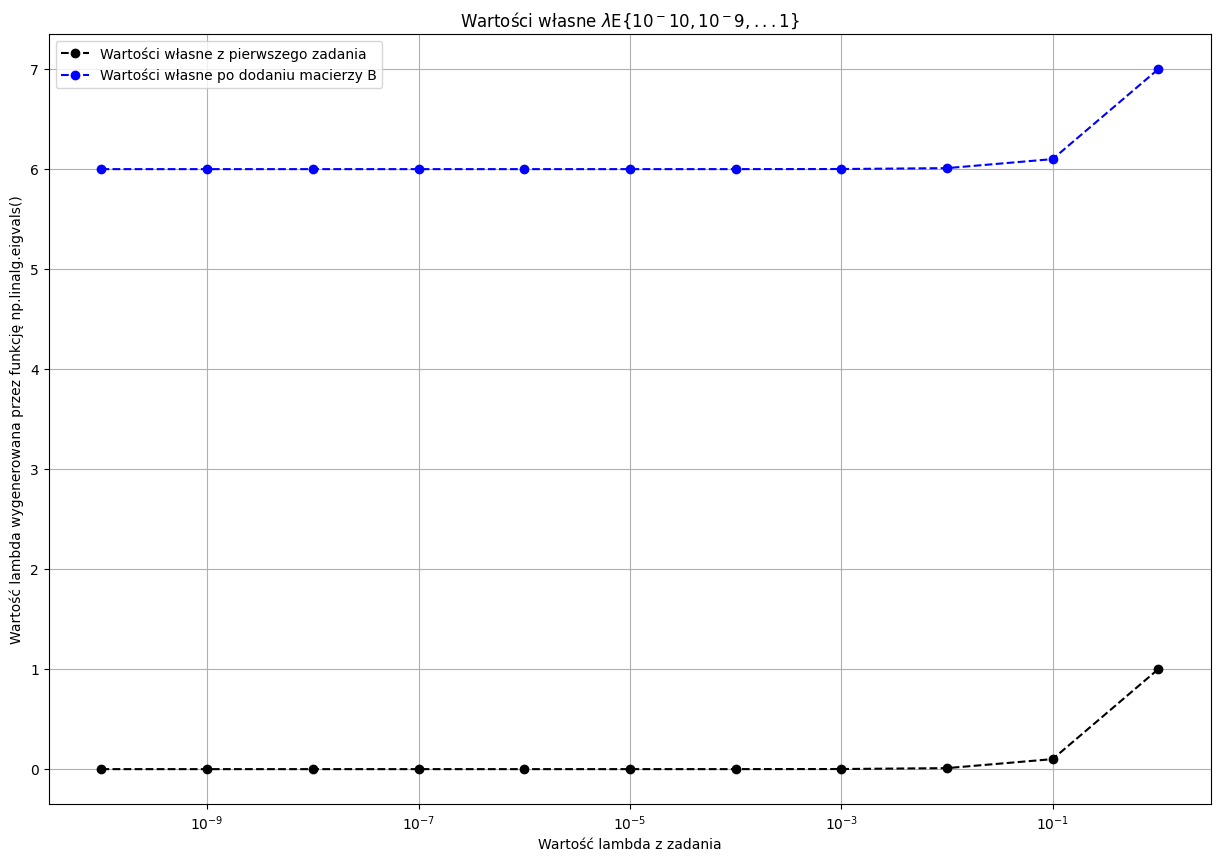

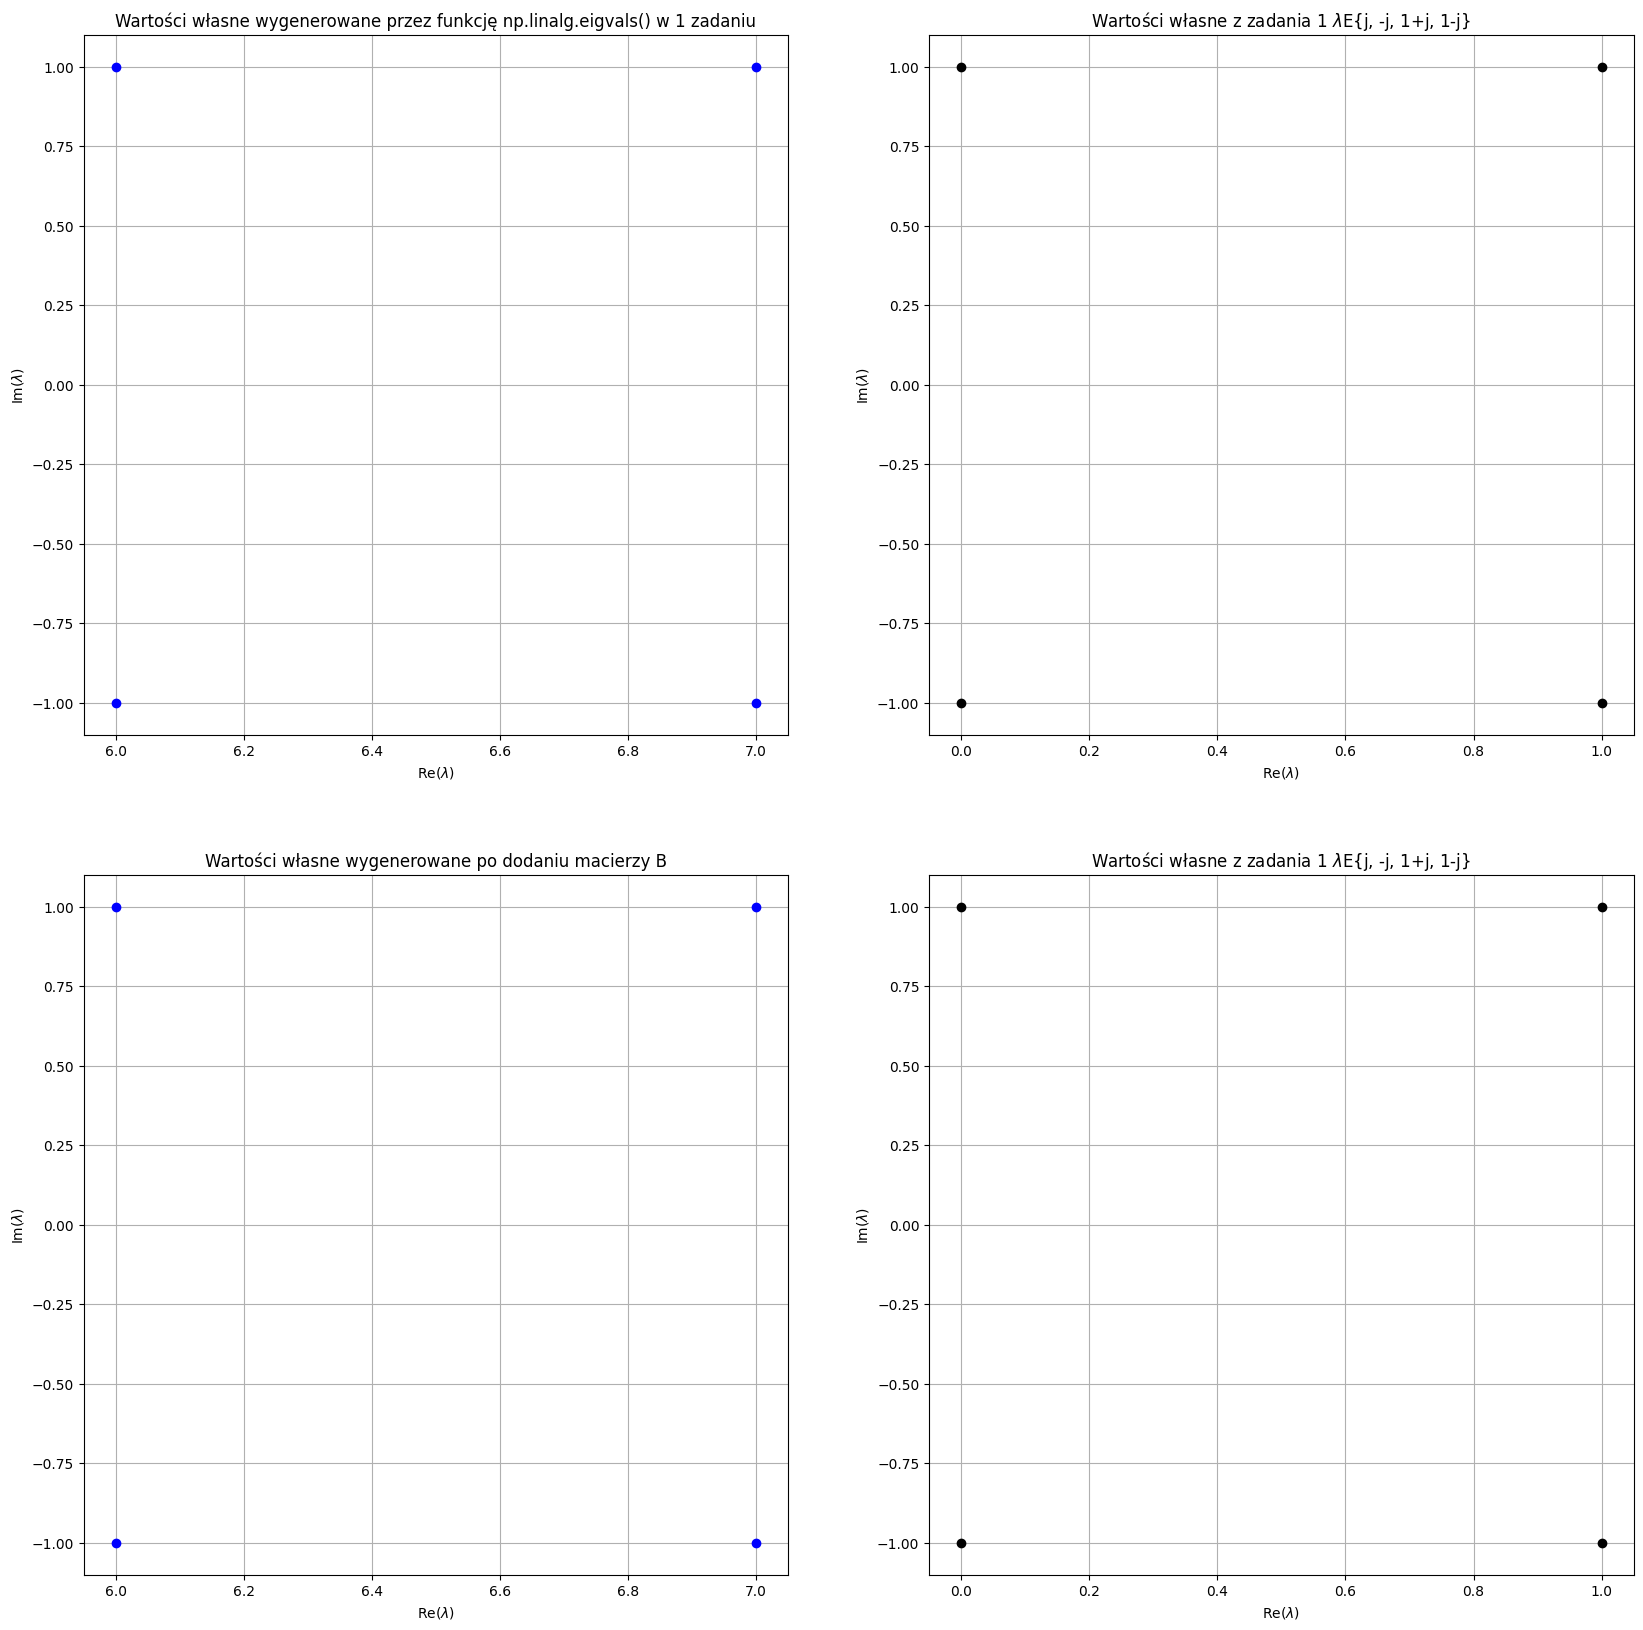

In [3]:
alfa = 6
A_with_B = []
new_eigenvalues = []
for matrix in matrices:
    B = alfa*np.eye(matrix.shape[0])
    a_with_b = matrix+B
    eigval = np.sort(np.linalg.eigvals(a_with_b))
    new_eigenvalues.append(eigval)
    A_with_B.append(a_with_b)

plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.plot(lambda1, eigvals[0], 'ko--', label="Wartości własne z pierwszego zadania")
ax.plot(lambda1, new_eigenvalues[0], 'bo--', label="Wartości własne po dodaniu macierzy B")
plt.xticks([i for i in range(21)])
ax.set(xlabel='Wartość lambda z zadania', ylabel='Wartość lambda wygenerowana przez funkcję np.linalg.eigvals()')
plt.title(label='Wartości własne $\lambda$E{0, 1, 2, ... 20}')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.plot(lambda2, eigvals[1], 'ko--', label="Wartości własne z pierwszego zadania")
ax.plot(lambda2, new_eigenvalues[1], 'bo--', label="Wartości własne po dodaniu macierzy B")
plt.xticks([10**i for i in range(-10, 1)])
ax.set(xlabel='Wartość lambda z zadania', ylabel='Wartość lambda wygenerowana przez funkcję np.linalg.eigvals()')
plt.title(label='Wartości własne $\lambda$E{$10^-10, 10^-9, ... 1$}')
plt.semilogx()
plt.legend()
plt.grid()
plt.show()

x = [item.real for item in eigvals[2]]
y = [item.imag for item in eigvals[2]]
x2 = [item.real for item in new_eigenvalues[2]]
y2 = [item.imag for item in new_eigenvalues[2]]

plt.figure(figsize=(20, 20))
ax = plt.subplot(2, 2, 1)
ax.plot(x2, y2, 'bo')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.title(label='Wartości własne wygenerowane przez funkcję np.linalg.eigvals() w 1 zadaniu')
plt.grid()


ax = plt.subplot(2, 2, 2)
ax.plot([item.real for item in lambda3], [item.imag for item in lambda3], 'ko')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.title(label='Wartości własne z zadania 1 $\lambda$E{j, -j, 1+j, 1-j}')
plt.grid()

ax = plt.subplot(2, 2, 3)
ax.plot(x2, y2, 'bo')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.title(label='Wartości własne wygenerowane po dodaniu macierzy B')
plt.grid()

ax = plt.subplot(2, 2, 4)
ax.plot([item.real for item in lambda3], [item.imag for item in lambda3], 'ko')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.title(label='Wartości własne z zadania 1 $\lambda$E{j, -j, 1+j, 1-j}')
plt.grid()
plt.show()

Po dodaniu, do randomowo wygenerowanych macierzy z wektorów wektorów własnych podanych w zadaniu, macierzy jednostkowej przemnożonej w moim przypadku przez czynnik $alfa$=6 wartości własne przesunęły sie po prostu o 6 jednostek w górę na wykresie. Jeżeli chodzi o wartości zespolone, ich część rzeczywista zwiększyła się o 6.

***Zadanie 3***   

Dokonaj analizy wrazliwości na zaburzenia ze wzgledu na uzywaną formę reprezentacji. Wykorzystaj do tego następujący zestaw wartości własnych: $\lambda = \{ 0 , 1 , 2 , ... , 20 \}$

1) Zaimplementuj funkcję *polly_from_egval* przekształcająca podane wartości własne, na wielomian charakterystyczny. W kolejnym kroku wykorzystaj zaimplementowana wczesniej funkcje *frob_a* do przejścia z postaci wielomiano charakterystycznego na macierz Frobeniusa. W ostatnim kroku oblicz wartości własne ostatecznej macierzy i wyrysuj jest na wykresie (w postaci kółek).

2) Kolejno powtórz czynności punktu pierwszego, dodając zaburzenia współczynników wielomianu charakterystycznego poprzez dodanie losowej wartości postaci $(10^{-10})N(0,1)$, przed przekształceniem na macierz Frobeiusa. Wartości własne narysuj na tym samym wykresie co uprzednie (w postaci krzyzyków)

3) Zaimplementuj funkcję przekształcająca podane wartości własne, na losową macierz (wykorzystaj zaimplementowana wczesniej funkcje *random_matrix_by_egval*). Potem oblicz wartości własne ostatecznej macierzy i wyrysuj jest na nowym wykresie (w postaci kółek).

4) Kolejno powtórz czynności punktu trzeciego, dodając zaburzenia do wygenerowanej (tej samej!) macierzy poprzez dodanie do niej macierzy $R$, gdzie kazda z jej wartości jest postaci $(10^{-10})N(0,1)$. Oblicz wartości własnej nowej macierzy i narysuj je na tym samym wykresie co uprzednie (w postaci krzyzyków)

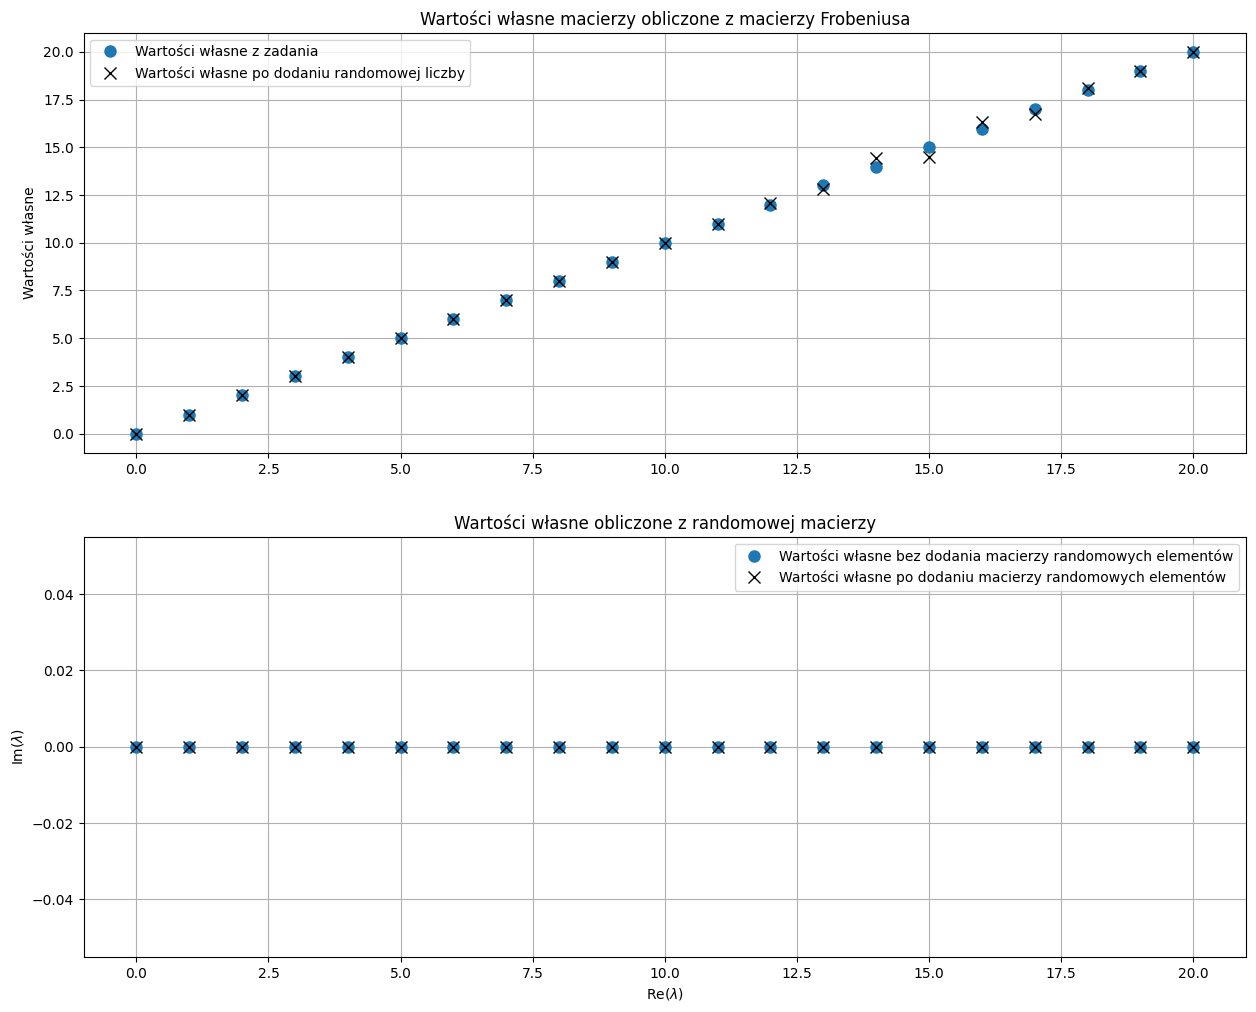

In [6]:
# 1
coeffs1 = main.polly_from_egval(lambda1)
frob_matrix1 = main.frob_a(coeffs1[1:])
eigenvalues1 = np.sort(np.linalg.eigvals(frob_matrix1))
real1 = [item.real for item in eigenvalues1]
imag1 = [item.imag for item in eigenvalues1]

# 2
coeffs2 = main.polly_from_egval(lambda1)
for i in range(len(coeffs2)):
    coeffs2[i] += (10**(-10))*np.random.normal()
frob_matrix2 = main.frob_a(coeffs2[1:])
eigenvalues2 = np.sort(np.linalg.eigvals(frob_matrix2))
real2 = [item.real for item in eigenvalues2]
imag2 = [item.imag for item in eigenvalues2]

# 3
rand_matrix3 = main.random_matrix_by_egval(lambda1)
eigenvalues3 = np.sort(np.linalg.eigvals(rand_matrix3))
real3 = [item.real for item in eigenvalues3]
imag3 = [item.imag for item in eigenvalues3]

# 4
s = len(rand_matrix3)
R = (10**(-10))*np.random.normal(size=(s, s))
rand_matrix3 += R
eigenvalues4 = np.sort(np.linalg.eigvals(rand_matrix3))
real4 = [item.real for item in eigenvalues4]
imag4 = [item.imag for item in eigenvalues4]

plt.figure(figsize=(15, 12))
ax = plt.subplot(2, 1, 1)
ax.plot(eigenvalues1, 'o', markersize=8, label='Wartości własne z zadania')
ax.plot(eigenvalues2, 'kx', markersize=8, label='Wartości własne po dodaniu randomowej liczby')
ax.set(ylabel='Wartości własne')
plt.grid()
plt.legend()
plt.title('Wartości własne macierzy obliczone z macierzy Frobeniusa')
plt.ylim()

ax = plt.subplot(2, 1, 2)
ax.plot(real3, imag3, 'o', markersize=8, label='Wartości własne bez dodania macierzy randomowych elementów')
ax.plot(real4, imag4, 'kx', markersize=8, label='Wartości własne po dodaniu macierzy randomowych elementów')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.title('Wartości własne obliczone z randomowej macierzy')
plt.grid()
plt.legend()
plt.show()

Jeżeli chodzi o pierwsze dwa kroki to używając macierzy Frobeniusa z pierwotnymi współczynnikami oraz z lekko zaburzonymi, wartości własne nie zmieniły się znacznie. Występują lekkie odchylenia od wartości początkowej jednak są one nieduże.
Natomiast w kroku trzecim i czwartym wartości rzeczywiste zamieniły się w zespolone i nie pokrywają się już tak dobrze z oryginalnymi.

***Zadanie 4***   

Dokonaj analizy dla zestawu wartości własnych: $\lambda = \{ 1 - 10^{-K}, K = 0,1,2,...,20 \}$. na dwa sposoby:

1) Poprzez utworzenie losowej macierzy, obliczenie wartości własnych, a następnie ich wyrysowania.
2) Poprzez obliczenie pierwiatków wielomianu charakterystycznego, a następnie ich wyrysowania.

Wykorzystaj wcześniej zaimplementowane funkcje.

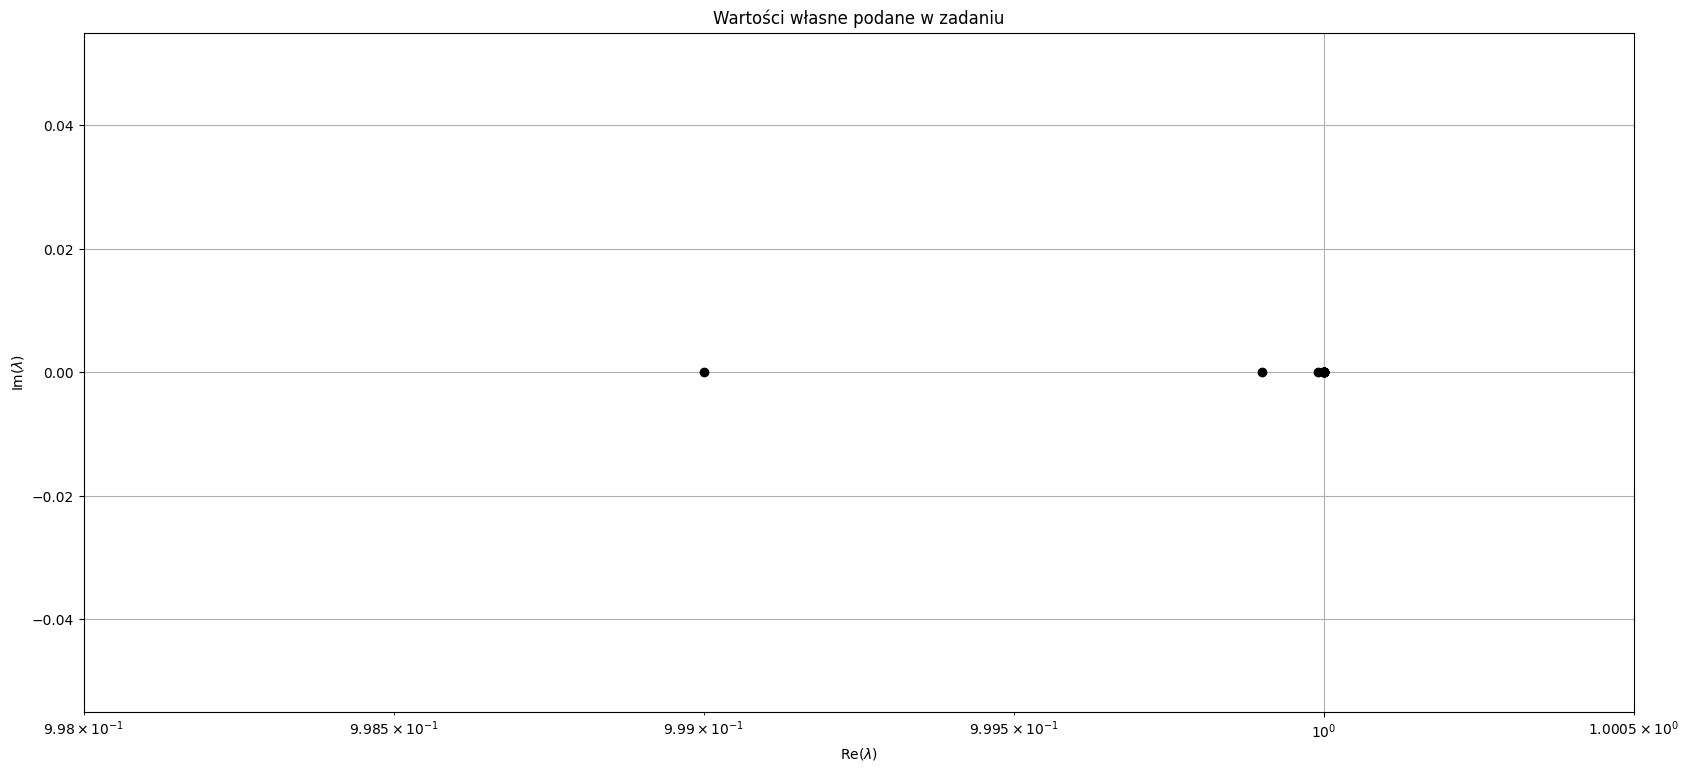

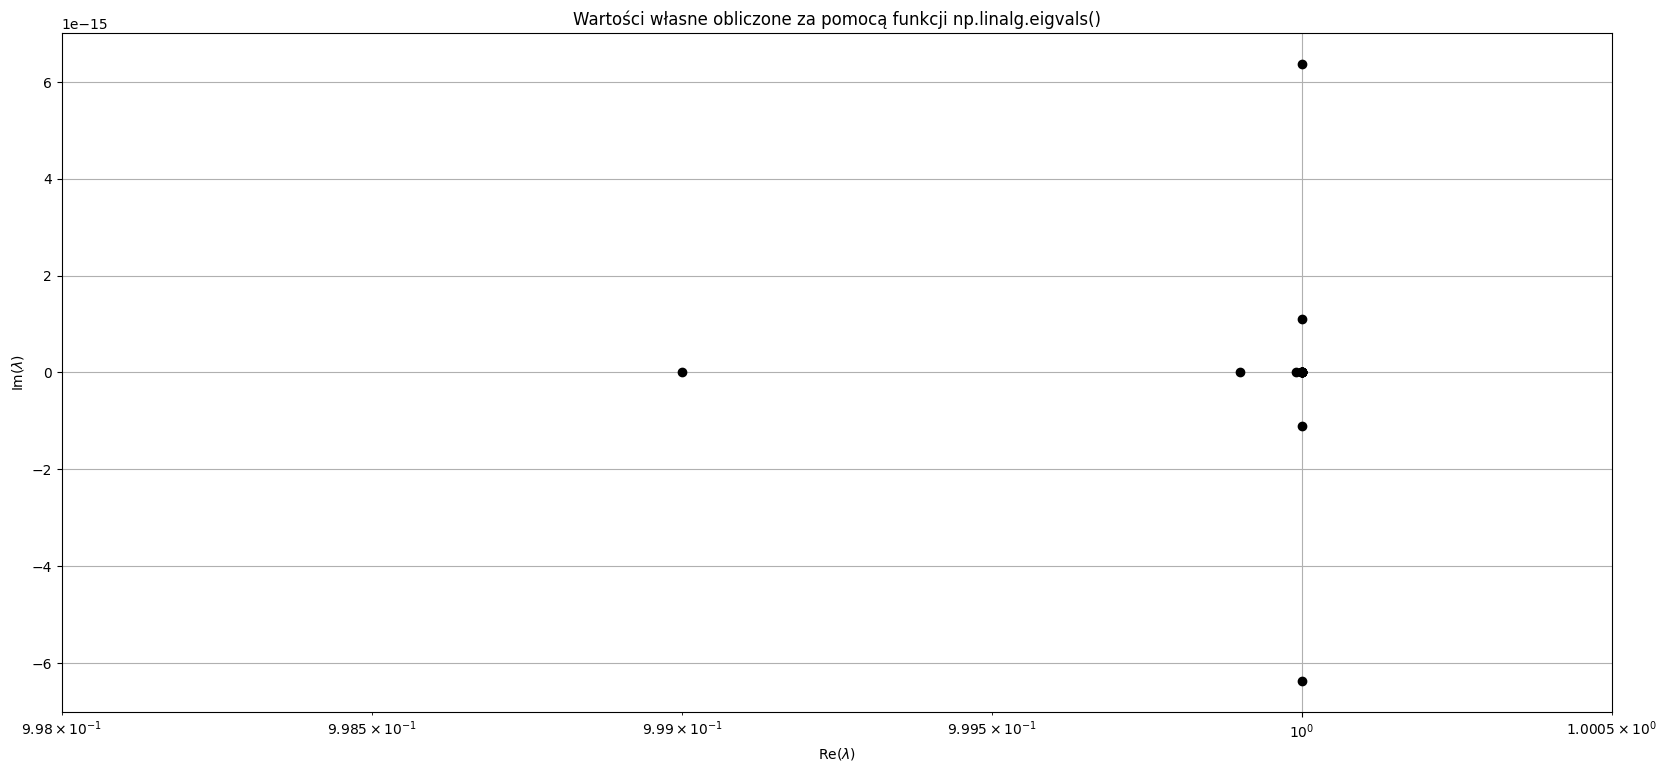

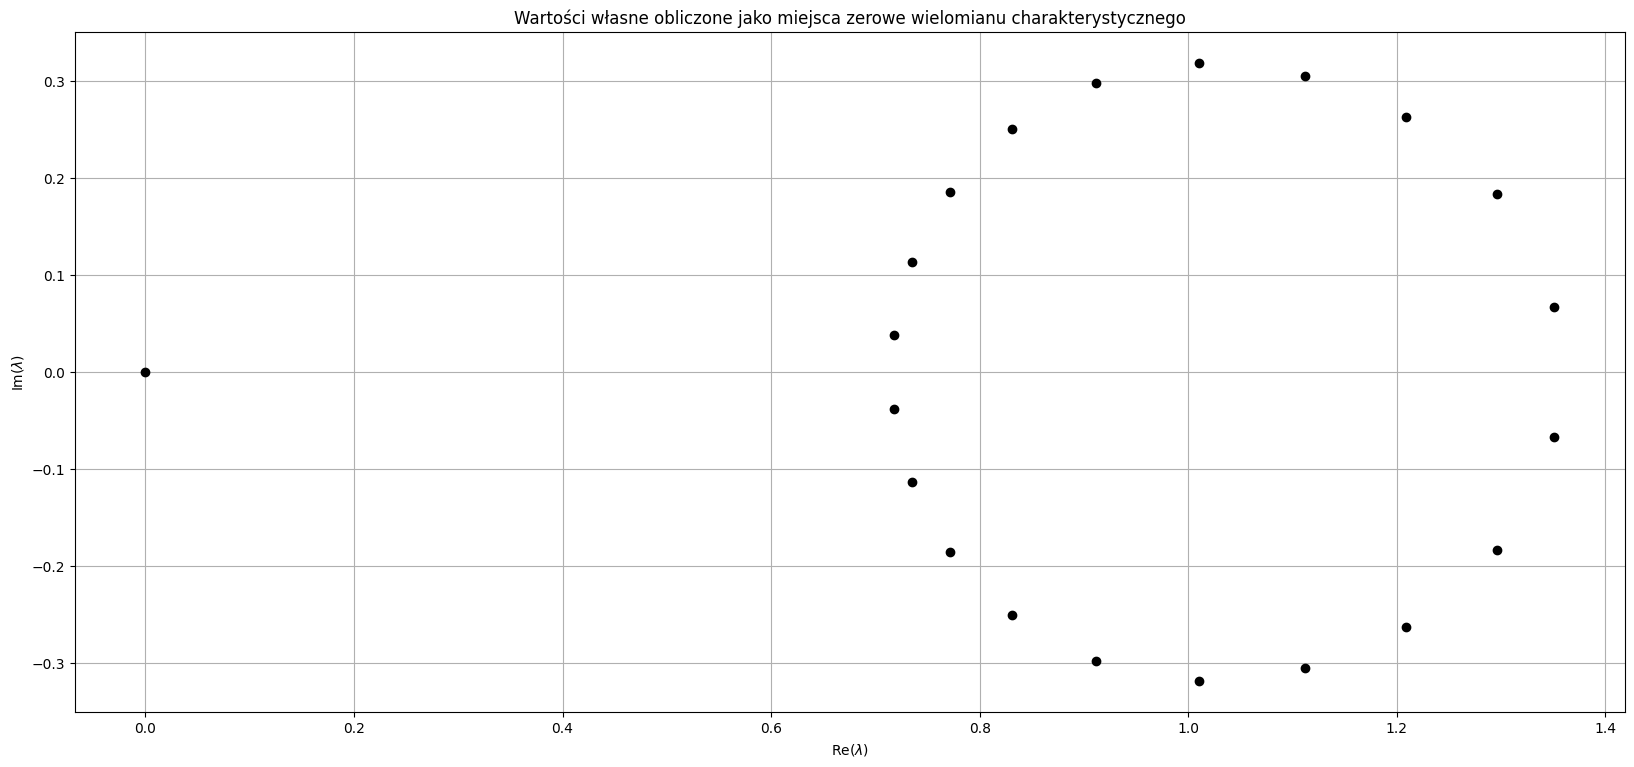

In [15]:
lambda_exp = [1-10**(-K) for K in range(0, 21)]

real_lambda_exp = [item.real for item in lambda_exp]
imag_lambda_exp = [item.imag for item in lambda_exp]

# sposob 1
random_matrix = main.random_matrix_by_egval(lambda_exp)
calculated_lambda_exp = np.linalg.eigvals(random_matrix)
real_1 = [item.real for item in calculated_lambda_exp]
imag_1 = [item.imag for item in calculated_lambda_exp]

# sposob 2
coeffs = main.polly_from_egval(lambda_exp)
calculated_roots_of_polynomial = np.roots(coeffs)
real_2 = [item.real for item in calculated_roots_of_polynomial]
imag_2 = [item.imag for item in calculated_roots_of_polynomial]

plt.figure(figsize=(20, 30))
ax = plt.subplot(3, 1, 1)
ax.plot(real_lambda_exp, imag_lambda_exp, 'ko')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.grid()
plt.xlim(0.998, 1.0005)
plt.semilogx()
plt.title(label='Wartości własne podane w zadaniu')

plt.figure(figsize=(20, 30))
ax = plt.subplot(3, 1, 2)
ax.plot(real_1, imag_1, 'ko')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.grid()
plt.xlim(0.998, 1.0005)
plt.semilogx()
plt.title(label='Wartości własne obliczone za pomocą funkcji np.linalg.eigvals()')

plt.figure(figsize=(20, 30))
ax = plt.subplot(3, 1, 3)
ax.plot(real_2, imag_2, 'ko')
ax.set(xlabel='Re($\lambda$)', ylabel='Im($\lambda$)')
plt.grid()
plt.title(label='Wartości własne obliczone jako miejsca zerowe wielomianu charakterystycznego')
plt.show()

Na pierwszym wykresie wyrysowałem wartości własne podane w poleceniu tak by można było porównać poniższe wykresy z oryginalnym wykresem. Na drugim wykresie można zauważyć dokładność obliczeń funkcji np.linalg.eigvals(), ponieważ zwróciła ona bardzo zbliżone wartości. Na wykresie pojawiają się części urojone tych wartości jednak są one na poziomie zera maszynowego. Natomiast trzeci wykres to wartości własne obliczone jako pierwiastki wielomianu charakterystycznego. Układają się one w okrąg poza jedną wartością w zerze.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)